## ROB317 TP1
### Hanin Hamdi
### Ahmed Yassine Hammami 
*************************
*********************

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Format d'images et Convolutions
### Question 1 

In [2]:
#Lecture image en niveau de gris et conversion en float64
img=np.float64(cv2.imread('TP1_features_Images/Image_Pairs/FlowerGarden2.png',0))
(h,w) = img.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes")

Dimension de l'image : 240 lignes x 360 colonnes


Méthode directe : 1.0768534 s
Méthode filter2D : 0.4812473 s


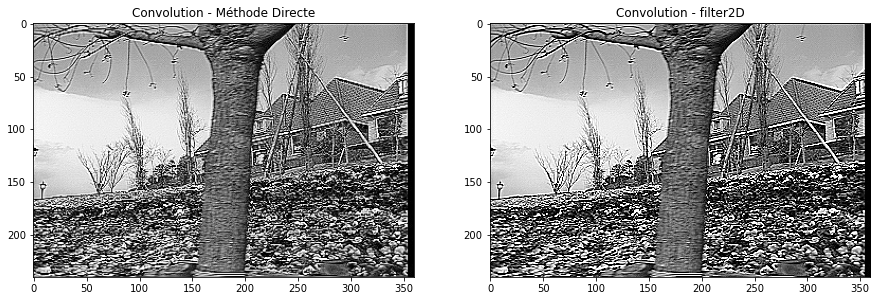

In [3]:
fig = plt.figure(figsize=(15, 10))
#Méthode directe
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
  for x in range(1,w-1):
    val = 5*img[y, x] - img[y-1, x] - img[y, x-1] - img[y+1, x] - img[y, x+1] 
    img2[y,x] = min(max(val,0),255)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe :",time,"s")

plt.subplot(121)
plt.imshow(img2,cmap = 'gray')
plt.title('Convolution - Méthode Directe')

#Méthode filter2D
t1 = cv2.getTickCount()
kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
img3 = cv2.filter2D(img,-1,kernel)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode filter2D :",time,"s")

plt.subplot(122)
plt.imshow(img3,cmap = 'gray',vmin = 0.0,vmax = 255.0)
plt.title('Convolution - filter2D')

plt.show()




### Question 3 
**Calcul de Ix** 

********Calcul de Ix **********

Méthode directe : 0.6794912 s
Méthode filter2D : 0.0011786 s


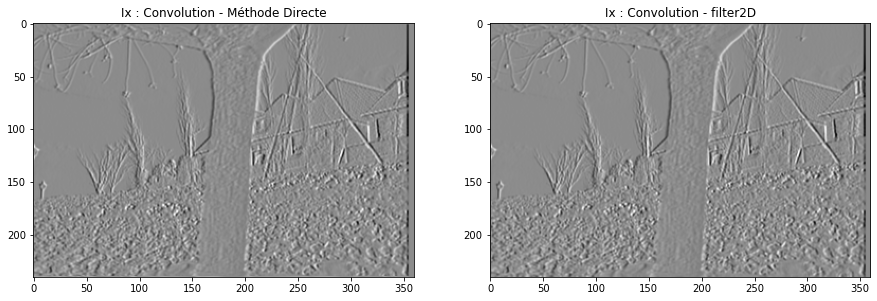

In [4]:
fig = plt.figure(figsize=(15, 10))
# Calcul de Ix
print("********Calcul de Ix **********\n")
#Méthode directe
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)

for y in range(1,h-1):
    for x in range(1,w-1):
        val = -img[y-1, x-1] - 2*img[y, x-1] - img[y+1, x-1] + img[y-1, x+1] + 2*img[y, x+1]+ img[y+1, x+1] 
        img2[y,x] = val
        
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe :",time,"s")

plt.subplot(121)
plt.imshow(img2,cmap = 'gray')
plt.title('Ix : Convolution - Méthode Directe')

#Méthode filter2D
t1 = cv2.getTickCount()

kernel_x = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])

img3 = cv2.filter2D(img,-1,kernel_x)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode filter2D :",time,"s")

plt.subplot(122)
plt.imshow(img3,cmap = 'gray')
plt.title('Ix : Convolution - filter2D')

plt.show()

**Calcul de Iy**

********Calcul de Iy **********

Méthode directe : 0.6976602 s
Méthode filter2D : 0.0015156 s


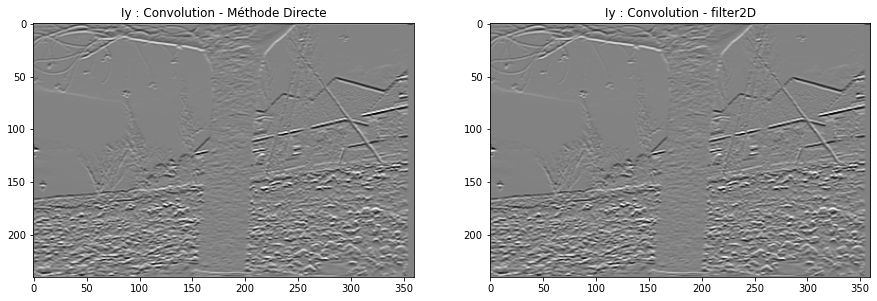

In [5]:
fig = plt.figure(figsize=(15, 10))
# Calcul de Iy
print("********Calcul de Iy **********\n")
#Méthode directe
t1 = cv2.getTickCount()
img2 = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE)
for y in range(1,h-1):
    for x in range(1,w-1):
        val = -img[y-1, x-1] - 2*img[y-1, x] - img[y-1, x+1] + img[y+1, x-1] + 2*img[y+1, x]+ img[y+1, x+1]
        img2[y,x] = val
        
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode directe :",time,"s")

plt.subplot(121)
plt.imshow(img2,cmap = 'gray')
plt.title('Iy : Convolution - Méthode Directe')

#Méthode filter2D
t1 = cv2.getTickCount()

kernel_y = np.array([[-1,-2,-1],
                     [0, 0, 0],
                     [1, 2, 1]])

img3 = cv2.filter2D(img,-1,kernel_y)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Méthode filter2D :",time,"s")

plt.subplot(122)
plt.imshow(img3,cmap = 'gray')
plt.title('Iy : Convolution - filter2D')

plt.show()

## Détecteurs 
### Question 4 

Dimension de l'image : 320 lignes x 400 colonnes
Type de l'image : float64
Mon calcul des points de Harris : 0.5007629 s
Nombre de cycles par pixel : 39.1221015625 cpp
Dimension de l'image : 320 lignes x 400 colonnes x 3 canaux
Type de l'image : uint8


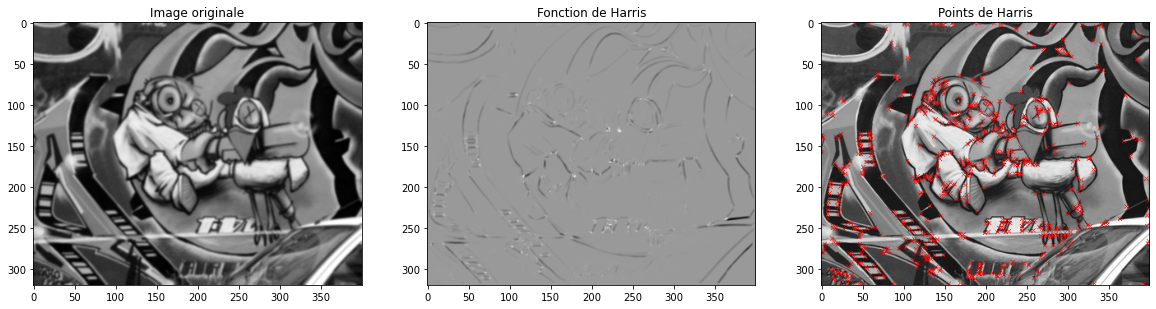

In [6]:
fig = plt.figure(figsize=(20, 15))
#Lecture image en niveau de gris et conversion en float64
img= cv2.GaussianBlur(cv2.imread('TP1_features_Images/Image_Pairs/Graffiti0.png',cv2.IMREAD_GRAYSCALE), (5,5), 0)
img=np.float64(img)
(h,w) = img.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes")
print("Type de l'image :",img.dtype)

#Début du calcul
t1 = cv2.getTickCount()  #get the time
Theta = cv2.copyMakeBorder(img,0,0,0,0,cv2.BORDER_REPLICATE) # make the border
# Mettre ici le calcul de la fonction d'intérêt de Harris
hx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])
hy = np.array([[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]])

h_sum = np.array([[1, 1, 1],
                 [1, 1, 1],
                 [1, 1, 1]])

Ix = cv2.filter2D(Theta,-1,hx)
Iy = cv2.filter2D(Theta,-1,hy)

Ixx = cv2.filter2D(Ix*Ix,-1,h_sum)
Ixy = cv2.filter2D(Ix*Iy,-1,h_sum)
Iyx = cv2.filter2D(Iy*Ix,-1,h_sum)
Iyy = cv2.filter2D(Iy*Iy,-1,h_sum)

sigma = (1,1)  # Changer sigma pour faire le calcul multi-échelles 
Ixx = cv2.GaussianBlur(Ixx,sigma,0)
Ixy = cv2.GaussianBlur(Ixy,sigma,0)
Iyx = cv2.GaussianBlur(Iyx,sigma,0)
Iyy = cv2.GaussianBlur(Iyy,sigma,0)

alpha = 0.06
Theta = (Ixx*Iyy - Ixy*Iyx -alpha*(Ixx+Iyy)**2)

# Calcul des maxima locaux et seuillage
Theta_maxloc = cv2.copyMakeBorder(Theta,0,0,0,0,cv2.BORDER_REPLICATE)
d_maxloc = 3
seuil_relatif = 0.01
se = np.ones((d_maxloc,d_maxloc),np.uint8)
Theta_dil = cv2.dilate(Theta,se)   
#Suppression des non-maxima-locaux
Theta_maxloc[Theta < Theta_dil] = 0.0
#On néglige également les valeurs trop faibles
Theta_maxloc[Theta < seuil_relatif*Theta.max()] = 0.0
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Mon calcul des points de Harris :",time,"s")
print("Nombre de cycles par pixel :",(t2 - t1)/(h*w),"cpp")

plt.subplot(131)
plt.imshow(img,cmap = 'gray')
plt.title('Image originale')

plt.subplot(132)
plt.imshow(Theta,cmap = 'gray')
plt.title('Fonction de Harris')

se_croix = np.uint8([[1, 0, 0, 0, 1],
                     [0, 1, 0, 1, 0],
                     [0, 0, 1, 0, 0],
                     [0, 1, 0, 1, 0],
                     [1, 0, 0, 0, 1]])

Theta_ml_dil = cv2.dilate(Theta_maxloc,se_croix)
#Relecture image pour affichage couleur
Img_pts=cv2.imread('TP1_features_Images/Image_Pairs/Graffiti0.png',cv2.IMREAD_COLOR)
(h,w,c) = Img_pts.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes x",c,"canaux")
print("Type de l'image :",Img_pts.dtype)
#On affiche les points (croix) en rouge
Img_pts[Theta_ml_dil > 0] = [255,0,0]
plt.subplot(133)
plt.imshow(Img_pts)
plt.title('Points de Harris')

plt.show()

### Question 6 

Dimension de l'image 1 : 418 lignes x 402 colonnes
Type de l'image 1 : uint8
Dimension de l'image 2 : 418 lignes x 402 colonnes
Type de l'image 2 : uint8
Détecteur : KAZE
Détection des points d'intérêt : 4.0235632 s


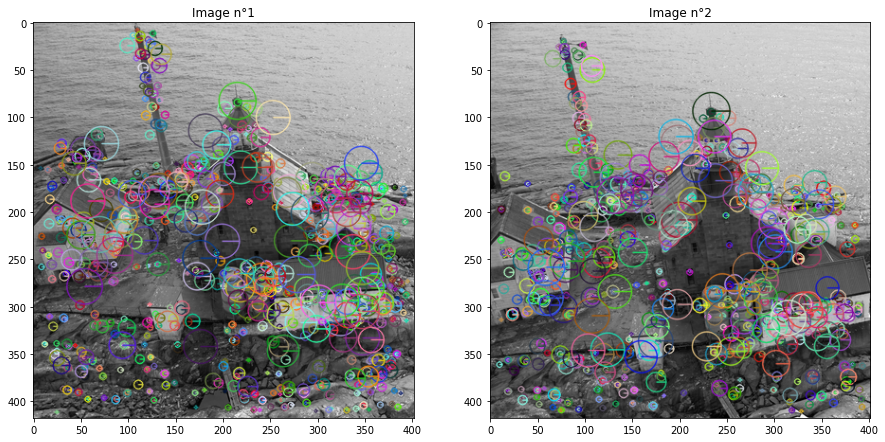

In [8]:
# Choisir le détecteur : 1 pour ORB et 2 pour Kaze
detector = 2

fig = plt.figure(figsize=(15, 10))
#Lecture de la paire d'images
img1 = cv2.imread('TP1_features_Images/Image_Pairs/torb_small1.png')
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)
img2 = cv2.imread('TP1_features_Images/Image_Pairs/torb_small2.png')
print("Dimension de l'image 2 :",img2.shape[0],"lignes x",img2.shape[1],"colonnes")
print("Type de l'image 2 :",img2.dtype)

#Début du calcul
t1 = cv2.getTickCount()
#Création des objets "keypoints"
if detector == 1:
  kp1 = cv2.ORB_create(nfeatures = 250,#Par défaut : 500
                       scaleFactor = 2,#Par défaut : 1.2
                       nlevels = 3)#Par défaut : 8
  kp2 = cv2.ORB_create(nfeatures=250,
                        scaleFactor = 2,
                        nlevels = 3)
  print("Détecteur : ORB")
else:
  kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		        threshold = 0.001,#Par défaut : 0.001
  		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  print("Détecteur : KAZE")
#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#Détection des keypoints
pts1 = kp1.detect(gray1,None)
pts2 = kp2.detect(gray2,None)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Détection des points d'intérêt :",time,"s")

#Affichage des keypoints
img1 = cv2.drawKeypoints(gray1, pts1, None, flags=4)
# flags définit le niveau d'information sur les points d'intérêt
# 0 : position seule ; 4 : position + échelle + direction
img2 = cv2.drawKeypoints(gray2, pts2, None, flags=4)

plt.subplot(121)
plt.imshow(img1)
plt.title('Image n°1')

plt.subplot(122)
plt.imshow(img2)
plt.title('Image n°2')

plt.show()


### Question 8

Dimension de l'image 1 : 418 lignes x 402 colonnes
Type de l'image 1 : uint8
Dimension de l'image 2 : 418 lignes x 402 colonnes
Type de l'image 2 : uint8
Détecteur : ORB
Détecteur : KAZE
Détection points et calcul descripteurs : 0.0373706 s
Calcul de l'appariement : 0.0188736 s


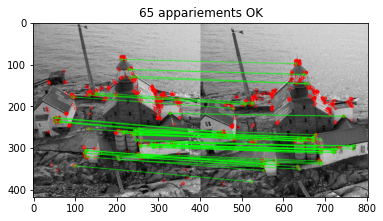

In [23]:
import sys

detector = 1
#Lecture de la paire d'images
img1 = cv2.imread('TP1_features_Images/Image_Pairs/torb_small1.png')
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)
img2 = cv2.imread('TP1_features_Images/Image_Pairs/torb_small2.png')
print("Dimension de l'image 2 :",img2.shape[0],"lignes x",img2.shape[1],"colonnes")
print("Type de l'image 2 :",img2.dtype)

#Début du calcul
t1 = cv2.getTickCount()
#Création des objets "keypoints"
if detector == 1:
  kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                       scaleFactor = 1.2,#Par défaut : 1.2
                       nlevels = 8)#Par défaut : 8
  kp2 = cv2.ORB_create(nfeatures=500,
                        scaleFactor = 1.2,
                        nlevels = 8)
  print("Détecteur : ORB")
else:
  kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		        threshold = 0.001,#Par défaut : 0.001
  		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
print("Détecteur : KAZE")
#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

#Détection et description des keypoints
pts1, desc1 = kp1.detectAndCompute(gray1,None)
pts2, desc2 = kp2.detectAndCompute(gray2,None)
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Détection points et calcul descripteurs :",time,"s")
# Calcul de l'appariement
t1 = cv2.getTickCount()
# Paramètres de FLANN 
FLANN_INDEX_KDTREE = 0
# on doit changer index_params avec KAZE
#index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
#search_params = dict(checks=50) 
# on doit changer index_params avec ORB
index_params = dict(algorithm=6,table_number=6,key_size=12,multi_probe_level=2)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(desc1,desc2,k=2)

# Application du ratio test
good = []
for m,n in matches:
  if m.distance < 0.7*n.distance:
    good.append([m])
t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Calcul de l'appariement :",time,"s")

# Affichage
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   flags = 0)

# Affichage des appariements qui respectent le ratio test
img3 = cv2.drawMatchesKnn(gray1,pts1,gray2,pts2,good,None,**draw_params)

Nb_ok = len(good)
plt.imshow(img3),plt.title('%i appariements OK'%Nb_ok)
plt.show()




### Question 9
**Features Match FLANN**

Dimension de l'image 1 : 418 lignes x 402 colonnes
Type de l'image 1 : uint8
Dimension de l'image 2 : 418 lignes x 402 colonnes
Type de l'image 2 : uint8
Détecteur : KAZE
Détection points et calcul descripteurs : 1.2485419 s
Détection points et calcul descripteurs image tournée : 1.9294109 s
Calcul de l'appariement : 2.2291871 s
Calcul de l'appariement image tournée : 2.2301564 s


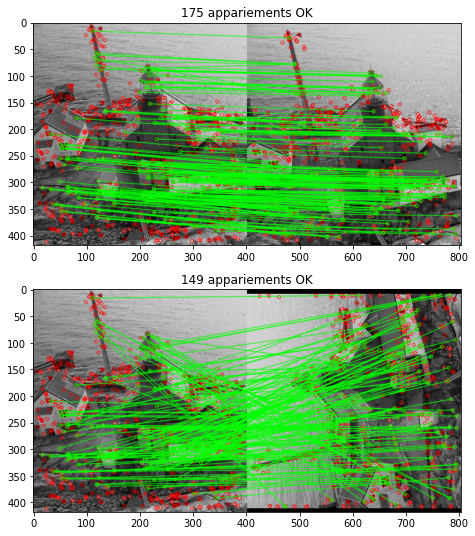

difference 26


In [24]:
detector = 2
#Lecture de la paire d'images
img1 = cv2.imread('TP1_features_Images/Image_Pairs/torb_small1.png')
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)
img2 = cv2.imread('TP1_features_Images/Image_Pairs/torb_small2.png')
print("Dimension de l'image 2 :",img2.shape[0],"lignes x",img2.shape[1],"colonnes")
print("Type de l'image 2 :",img2.dtype)
rows = img2.shape[0]
cols = img2.shape[1]
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
img3 = cv2.warpAffine(img2,M,(cols,rows))
#Début du calcul
t1 = cv2.getTickCount()
#Création des objets "keypoints"
if detector == 1:
  kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                       scaleFactor = 1.2,#Par défaut : 1.2
                       nlevels = 8)#Par défaut : 8
  kp2 = cv2.ORB_create(nfeatures=500,
                        scaleFactor = 1.2,
                        nlevels = 8)
  kp3 = cv2.ORB_create(nfeatures=500,
                        scaleFactor = 1.2,
                        nlevels = 8)
  print("Détecteur : ORB")
else:
  kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		        threshold = 0.001,#Par défaut : 0.001
  		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp3 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  print("Détecteur : KAZE")
#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray3 =  cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
#Détection et description des keypoints
pts1, desc1 = kp1.detectAndCompute(gray1,None)
pts2, desc2 = kp2.detectAndCompute(gray2,None)
t2 = cv2.getTickCount()
pts3, desc3 = kp3.detectAndCompute(gray3,None)
t3 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
time1 = (t3 - t1)/ cv2.getTickFrequency()
print("Détection points et calcul descripteurs :",time,"s")
print("Détection points et calcul descripteurs image tournée :",time1,"s")
# Paramètres de FLANN 
FLANN_INDEX_KDTREE = 0
# on doit changer index_params avec KAZE
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) 
# on doit changer index_params avec ORB
#index_params = dict(algorithm=6,table_number=6,key_size=12,multi_probe_level=2)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(desc1,desc2,k=2)
matches1 = flann.knnMatch(desc1,desc3,k=2)
# Application du ratio test
good = []
good1 = []
for m,n in matches:
  if m.distance < 0.7*n.distance:
    good.append([m])
t2 = cv2.getTickCount()
for m1,n1 in matches1:
  if m1.distance < 0.7*n1.distance:
    good1.append([m1])
t3 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
time1 = (t3 - t1)/ cv2.getTickFrequency()
print("Calcul de l'appariement :",time,"s")
print("Calcul de l'appariement image tournée :",time1,"s")

# Affichage des appariements qui respectent le ratio test
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   flags = 0)
img4 = cv2.drawMatchesKnn(gray1,pts1,gray2,pts2,good,None,**draw_params)
img5 = cv2.drawMatchesKnn(gray1,pts1,gray3,pts3,good,None,**draw_params)
plt.figure(figsize = (9, 9))
plt.subplot(211)
Nb_ok = len(good)
plt.imshow(img4),plt.title('%i appariements OK'%Nb_ok)
plt.subplot(212)
Nb_ok1 = len(good1)
plt.imshow(img5),plt.title('%i appariements OK'%Nb_ok1)
plt.show()

print("difference",Nb_ok-Nb_ok1)


**Features Match Cross**

Dimension de l'image 1 : 418 lignes x 402 colonnes
Type de l'image 1 : uint8
Dimension de l'image 2 : 418 lignes x 402 colonnes
Type de l'image 2 : uint8
Détecteur : KAZE
Détection points et calcul descripteurs : 1.8647336 s
Détection points et calcul descripteurs image tournée : 1.8723721 s
Calcul de l'appariement : 0.1426923 s


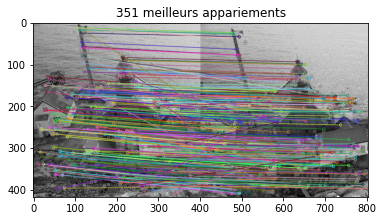

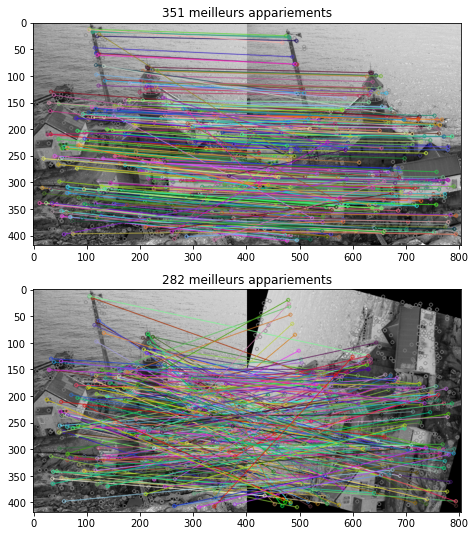

difference 69


In [19]:
import numpy as np
import cv2

from matplotlib import pyplot as plt

import sys
detector=2

#Lecture de la paire d'images
img1 = cv2.imread('TP1_features_Images/Image_Pairs/torb_small1.png')
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)
img2 = cv2.imread('TP1_features_Images/Image_Pairs/torb_small2.png')
print("Dimension de l'image 2 :",img2.shape[0],"lignes x",img2.shape[1],"colonnes")
print("Type de l'image 2 :",img2.dtype)

rows = img2.shape[0]
cols = img2.shape[1]
M = cv2.getRotationMatrix2D((cols/2,rows/2),75,1)
img3 = cv2.warpAffine(img2,M,(cols,rows))

#Début du calcul
t1 = cv2.getTickCount()
#Création des objets "keypoints"
if detector == 1:
  kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                       scaleFactor = 1.2,#Par défaut : 1.2
                       nlevels = 8)#Par défaut : 8
  kp2 = cv2.ORB_create(nfeatures=500,
                        scaleFactor = 1.2,
                        nlevels = 8)
  kp3 = cv2.ORB_create(nfeatures=500,
                        scaleFactor = 1.2,
                        nlevels = 8)
  print("Détecteur : ORB")
else:
  kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		        threshold = 0.001,#Par défaut : 0.001
  		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp3 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  print("Détecteur : KAZE")
#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray3 =  cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
#Détection et description des keypoints
pts1, desc1 = kp1.detectAndCompute(gray1,None)
pts2, desc2 = kp2.detectAndCompute(gray2,None)
pts3, desc3 = kp3.detectAndCompute(gray3,None)
t3 = cv2.getTickCount()

#Les points non appariés apparaîtront en gris 
img1 = cv2.drawKeypoints(gray1, pts1, None, color=(127,127,127), flags=0)
img2 = cv2.drawKeypoints(gray2, pts2, None, color=(127,127,127), flags=0)
t2 = cv2.getTickCount()

img3= cv2.drawKeypoints(gray3, pts3, None, color=(127,127,127), flags=0)
t3 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()

time1 = (t3 - t1)/ cv2.getTickFrequency()
print("Détection points et calcul descripteurs :",time,"s")
print("Détection points et calcul descripteurs image tournée :",time1,"s")

# Calcul de l'appariement
t1 = cv2.getTickCount()
if detector == 1:
  #Distance de Hamming pour descripteur BRIEF (ORB)
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
else:
  #Distance L2 pour descripteur M-SURF (KAZE)
  bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(desc1,desc2)
matches1 = bf.match(desc1,desc3)
# Tri des appariemements 

matches = sorted(matches, key = lambda x:x.distance)
matches1 = sorted(matches1, key = lambda x:x.distance)

t2 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
print("Calcul de l'appariement :",time,"s")

# Trace les N meilleurs appariements
Nb_ok = len(matches)
Nb_ok1 = len(matches1)
img4 = cv2.drawMatches(img1,pts1,img2,pts2,matches,None,flags=2)
img5 = cv2.drawMatches(img1,pts1,img3,pts2,matches1,None,flags=2)
plt.imshow(img4),plt.title('%i meilleurs appariements'%Nb_ok)
plt.show()

plt.figure(figsize = (9, 9))
plt.subplot(211)
plt.imshow(img4),plt.title('%i meilleurs appariements'%Nb_ok)
plt.subplot(212)

plt.imshow(img5),plt.title('%i meilleurs appariements'%Nb_ok1)
plt.show()

print("difference",Nb_ok-Nb_ok1)


**Features Match Ratio**

Dimension de l'image 1 : 418 lignes x 402 colonnes
Type de l'image 1 : uint8
Dimension de l'image 2 : 418 lignes x 402 colonnes
Type de l'image 2 : uint8
Détecteur : ORB
Détection points et calcul descripteurs : 0.0307782 s
Détection points et calcul descripteurs image tournée : 0.0443477 s
Calcul de l'appariement : 0.0970272 s
Calcul de l'appariement image tournée : 0.0976104 s


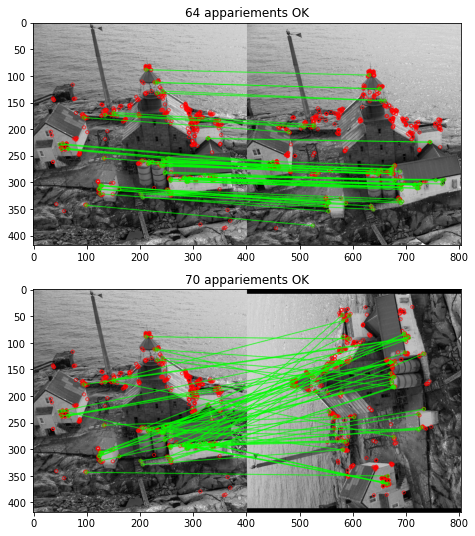

difference -6


In [18]:
detector=1

#Lecture de la paire d'images
img1 = cv2.imread('TP1_features_Images/Image_Pairs/torb_small1.png')
print("Dimension de l'image 1 :",img1.shape[0],"lignes x",img1.shape[1],"colonnes")
print("Type de l'image 1 :",img1.dtype)
img2 = cv2.imread('TP1_features_Images/Image_Pairs/torb_small2.png')
print("Dimension de l'image 2 :",img2.shape[0],"lignes x",img2.shape[1],"colonnes")
print("Type de l'image 2 :",img2.dtype)


rows = img2.shape[0]
cols = img2.shape[1]
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
img3 = cv2.warpAffine(img2,M,(cols,rows))

#Début du calcul
t1 = cv2.getTickCount()
#Création des objets "keypoints"
if detector == 1:
  kp1 = cv2.ORB_create(nfeatures = 500,#Par défaut : 500
                       scaleFactor = 1.2,#Par défaut : 1.2
                       nlevels = 8)#Par défaut : 8
  kp2 = cv2.ORB_create(nfeatures=500,
                        scaleFactor = 1.2,
                        nlevels = 8)
  kp3 = cv2.ORB_create(nfeatures=500,
                        scaleFactor = 1.2,
                        nlevels = 8)
  print("Détecteur : ORB")
else:
  kp1 = cv2.KAZE_create(upright = False,#Par défaut : false
    		        threshold = 0.001,#Par défaut : 0.001
  		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp2 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  kp3 = cv2.KAZE_create(upright = False,#Par défaut : false
	  	        threshold = 0.001,#Par défaut : 0.001
		        nOctaves = 4,#Par défaut : 4
		        nOctaveLayers = 4,#Par défaut : 4
		        diffusivity = 2)#Par défaut : 2
  print("Détecteur : KAZE")
#Conversion en niveau de gris
gray1 =  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2 =  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
gray3 =  cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
#Détection et description des keypoints
pts1, desc1 = kp1.detectAndCompute(gray1,None)
pts2, desc2 = kp2.detectAndCompute(gray2,None)
t2 = cv2.getTickCount()
pts3, desc3 = kp3.detectAndCompute(gray3,None)
t3 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
time1 = (t3 - t1)/ cv2.getTickFrequency()
print("Détection points et calcul descripteurs :",time,"s")
print("Détection points et calcul descripteurs image tournée :",time1,"s")
# Calcul de l'appariement
t1 = cv2.getTickCount()
if detector == 1:
  #Distance de Hamming pour descripteur BRIEF (ORB)
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
else:
  #Distance L2 pour descripteur M-SURF (KAZE)
  bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
# Extraction de la liste des 2-plus-proches-voisins
matches = bf.knnMatch(desc1,desc2, k=2)
matches1 = bf.knnMatch(desc1,desc3, k=2)

# Application du ratio test
good = []
good1 = []
for m,n in matches:
  if m.distance < 0.7*n.distance:
    good.append([m])
t2 = cv2.getTickCount()
for m1,n1 in matches1:
  if m1.distance < 0.7*n1.distance:
    good1.append([m1])
t3 = cv2.getTickCount()
time = (t2 - t1)/ cv2.getTickFrequency()
time1 = (t3 - t1)/ cv2.getTickFrequency()
print("Calcul de l'appariement :",time,"s")
print("Calcul de l'appariement image tournée :",time1,"s")

# Affichage des appariements qui respectent le ratio test
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   flags = 0)
img4 = cv2.drawMatchesKnn(gray1,pts1,gray2,pts2,good,None,**draw_params)
img5 = cv2.drawMatchesKnn(gray1,pts1,gray3,pts3,good,None,**draw_params)
plt.figure(figsize = (9, 9))
plt.subplot(211)
Nb_ok = len(good)
plt.imshow(img4),plt.title('%i appariements OK'%Nb_ok)
plt.subplot(212)
Nb_ok1 = len(good1)
plt.imshow(img5),plt.title('%i appariements OK'%Nb_ok1)
plt.show()

print("difference",Nb_ok-Nb_ok1)

